# Домашнее задание №4. 
# Предобработка признаков, Pandas.
### Выполнила: Леонтьева Ксения Андреевна
### Группа: НПМбд-01-19

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Необходимо выложить файл с решением в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [217]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [218]:
def max_element(arr):
    
    new_arr = np.append(1, arr) # сдвиг исходного массива вправо на 1 элемент с добавлением 1 в начале для сохранения размерности
    tf = (new_arr == 0)[:len(new_arr) - 1] # для нового массива выводит True, где есть нули, и False, где их нет
    if len(arr[tf]) == 0:
        return None
    else:
        return max(arr[tf])

In [219]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
print ('Ответ:', max_element(x))

Ответ: 5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [220]:
def nearest_value(X, v):
    
    Y = X.flatten()       # преобразование матрицы в одномерный массив
    return Y[np.argmin(np.abs(Y-v))]

In [221]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
print ('Ответ:', nearest_value(X, v))

Ответ: 4


In [222]:
# def nearest_value(X, v):
#     return np.min(np.abs(X - v)) + v

# X = np.arange(0,10).reshape((2, 5))
# v = 3.6
# print ('Ответ:', nearest_value(X, v))

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [223]:
def scale(X):

    stand = X.std(axis=0)
    if np.count_nonzero(stand) != len(stand):
        return 'Деление на ноль'
    else:
        X = X - X.mean(axis=0)
        X = X / stand
    return X

#     stand = X.std(axis=0)
#     X = X - X.mean(axis=0)
#     stand[stand == 0] = 1
#     X = X / stand
#     return X

In [224]:
X = np.random.randint(1, 20, size=(3,4))
print ('Исходная матрица:')
print(X)
print ('Ответ:')
print(scale(X))

Исходная матрица:
[[14  8 10 18]
 [10 14  6  5]
 [ 3 17 13 10]]
Ответ:
[[ 1.09985336 -1.33630621  0.11624764  1.30740289]
 [ 0.21997067  0.26726124 -1.27872403 -1.12063105]
 [-1.31982404  1.06904497  1.16247639 -0.18677184]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [225]:
def get_stats(X):
    
    print('Определитель:', np.linalg.det(X))
    print('След:', np.trace(X))
    print('Наименьший элемент:', np.min(X))
    print('Наибольший элемент:', np.max(X))
    print('Норма Фробениуса:', np.linalg.norm(X, 'fro'))
    print('Собственные числа:', np.linalg.eigvals(X)) # для несимметричной матрицы
    print('Обратная матрица:')
    print(np.linalg.inv(X))
    
    return

In [226]:
X = np.random.normal(10, 1, (3, 3))
X

array([[12.17930634, 11.41754621,  8.50550192],
       [ 9.52008567,  9.64589944, 10.27375665],
       [10.35887119,  8.33827866, 11.41194069]])

In [227]:
get_stats(X)

Определитель: 97.30884566523221
След: 33.237146460034396
Наименьший элемент: 8.338278663119953
Наибольший элемент: 12.17930633541642
Норма Фробениуса: 30.778732974553826
Собственные числа: [30.59277445+0.j         1.32218601+1.1969139j  1.32218601-1.1969139j]
Обратная матрица:
[[ 0.25088147 -0.61017182  0.3623296 ]
 [-0.02279475  0.52289309 -0.4537524 ]
 [-0.21107539  0.17180802  0.09027284]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [228]:
maximum = np.zeros(100)
for exp_num in range(100):
#     X1 = np.random.randn(10, 10)
#     X2 = np.random.randn(10, 10)
    X1 = np.random.normal(0, 1, (10, 10))
    X2 = np.random.normal(0, 1, (10, 10))
    maximum[exp_num] = np.max(X1.dot(X2))
    
print('Cреднее значение по экспериментам у максимальных элементов:', maximum.mean())
print('95-процентная квантиль:', np.quantile(maximum, 0.95))

Cреднее значение по экспериментам у максимальных элементов: 8.651774529677414
95-процентная квантиль: 12.429223367967113


# Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [229]:
import pandas as pd
%matplotlib inline

In [230]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_predict

In [231]:
pass_data = pd.read_csv('2008.csv')
pass_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


## **6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [232]:
popular = pass_data.CancellationCode.mode()
print('Самое популярная причина отмены рейса:', *popular)

Самое популярная причина отмены рейса: A


A - carrier

## **7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [233]:
mean_distance = pass_data.Distance.mean()
print ('Среднее расстояние, пройденное самолетом:', mean_distance)

Среднее расстояние, пройденное самолетом: 724.5082571428571


In [234]:
min_distance = pass_data.Distance.min()
print ('Минимальное расстояние, пройденное самолетом:', min_distance)

Минимальное расстояние, пройденное самолетом: 31


In [235]:
max_distance = pass_data.Distance.max()
print ('Максимальное расстояние, пройденное самолетом:', max_distance)

Максимальное расстояние, пройденное самолетом: 4962


## **8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [236]:
days = pass_data[(pass_data['Distance'] == min_distance)]
days[['Year','Month','DayofMonth', 'DayOfWeek', 'Distance', 'FlightNum']]

,Year,Month,DayofMonth,DayOfWeek,Distance,FlightNum
1116,2008,12,30,2,31,65
6958,2008,12,26,5,31,65
17349,2008,8,18,1,31,64
27534,2008,3,11,2,31,64
46082,2008,8,9,6,31,65
48112,2008,2,28,4,31,64


In [237]:
other_distance = pass_data[((pass_data['FlightNum'] == 64) | (pass_data['FlightNum'] == 65)) & (pass_data['Distance'] != 31)]
other_distance[['Year','Month','DayofMonth', 'DayOfWeek', 'Distance', 'FlightNum']]

,Year,Month,DayofMonth,DayOfWeek,Distance,FlightNum
501,2008,3,20,4,533,64
1389,2008,3,13,4,680,64
1517,2008,7,10,4,680,65
2619,2008,5,23,5,2381,64
3869,2008,7,1,2,82,64
...,...,...,...,...,...,...
66529,2008,12,21,7,82,65
67172,2008,3,22,6,533,64
68264,2008,9,7,7,386,65
68338,2008,8,3,7,2454,65


Минимальное расстояние выглядит подозрительным, т.к. в этими же рейсами в другие дни было пройдено расстояние в разы большее.

## **9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [238]:
origin = pass_data.groupby(['Origin'])
print('Больше всего вылетов было произведено из аэропорта:',*origin.size().sort_values(ascending = False).head(1).keys())

Больше всего вылетов было произведено из аэропорта: ATL


ATL - Атланта

## **10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [239]:
mean_airtime = pass_data.groupby(['Origin'])['AirTime'].mean()
mean_airtime

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

In [240]:
print('Наибольшее значение среднего времени полета имеет аэропорт:', mean_airtime.sort_values(ascending = False).head(1).keys()[0])

Наибольшее значение среднего времени полета имеет аэропорт: SJU


## **11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [241]:
# Количество рейсов > 1000
depdelay1 = pass_data.groupby(['Origin']).size()
depdelay1[depdelay1 > 1000]

Origin
ATL    4134
BOS    1162
BWI    1032
CLT    1250
DEN    2383
DFW    2793
DTW    1610
EWR    1389
IAH    1795
JFK    1201
LAS    1793
LAX    2082
LGA    1169
MCO    1338
MSP    1254
ORD    3550
PHL    1027
PHX    2031
SEA    1128
SFO    1408
SLC    1325
dtype: int64

In [242]:
# Задержка > 0  у аэропортов, у которых всего рейсов больше 1000
depdelay2 = pass_data[pass_data['DepDelay'] > 0].groupby(['Origin']).size()
depdelay2 = depdelay2[depdelay1 > 1000]
depdelay2

Origin
ATL    1739
BOS     376
BWI     467
CLT     498
DEN    1063
DFW    1283
DTW     569
EWR     710
IAH     841
JFK     444
LAS     779
LAX     859
LGA     358
MCO     537
MSP     459
ORD    1649
PHL     432
PHX     858
SEA     495
SFO     558
SLC     424
dtype: int64

In [243]:
depdelay3 = depdelay2 / depdelay1[depdelay1 > 1000]
print('Найдите аэропорт, у которого наибольшая доля задержанных рейсов:', *depdelay3.sort_values(ascending = False).head(1).keys())

Найдите аэропорт, у которого наибольшая доля задержанных рейсов: EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

## **12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект (строка) - признак (столбец)"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [244]:
df = pd.read_csv('2008.csv')

In [245]:
if df.isnull().sum().sum() > 0:
    print('Пропущенные значения есть')
    print('Всего пропущенных элементов в таблице:', df.isnull().sum().sum())
else:
    print('Пропущенных значений нет')
print(np.count_nonzero(df.isnull().sum(axis=1)), 'объектов имеют хотя бы один пропуск')
print(np.count_nonzero(df.isnull().sum(axis=0)), 'признаков имеют хотя бы один пропуск')

Пропущенные значения есть
Всего пропущенных элементов в таблице: 355215
70000 объектов имеют хотя бы один пропуск
16 признаков имеют хотя бы один пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [246]:
if df['DepDelay'].isnull().any():
    print('Пропущенные значения в целевой переменной есть')
else:
    print('Пропущенныx значений в целевой переменной нет')

Пропущенные значения в целевой переменной есть


In [247]:
df[(df['DepDelay'].isnull())]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [248]:
print('Количество отмененных рейсов с непустой целевой переменной:', len(df[(df['DepDelay'].isnull() == False) & (df['Cancelled'] == 1)]))

Количество отмененных рейсов с непустой целевой переменной: 12


Пропущенные значения целевой переменной присутствуют в строках, где в признаке "Cancelled" стоят 1, то есть рейсы были отменены. Также количество отмененных рейсов с непустой целевой переменной существенно меньше, чем с пустой целевой переменной. Тогда данные признаки можно исключить из рассмотрения, т.к. они никак не влияют на значение задержки. Т.к. "CancellationCode" и "Cancelled" связаны между собой, то при удалении последнего признака необходимо удалить и первый.

In [249]:
df_new = df[(df['DepDelay'].isnull() == False)] 
df_new = df_new[(df_new['DepDelay'] != 0)]
df_new = df_new.drop('Cancelled', axis=1)
df_new = df_new.drop('CancellationCode', axis=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,BDL,661,12.0,13.0,0,NaN,NaN,NaN,NaN,NaN
63400,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,ATL,606,22.0,20.0,0,NaN,NaN,NaN,NaN,NaN
63401,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,GRR,137,4.0,13.0,0,0.0,0.0,0.0,0.0,22.0
63402,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,MSP,1416,20.0,22.0,0,0.0,0.0,15.0,0.0,6.0


In [250]:
y = df_new['DepDelay']
X = df_new.drop('DepDelay', axis=1)
y

0        16.0
1        16.0
2        -2.0
3        -3.0
4        -5.0
         ... 
63399    -5.0
63400   -11.0
63401    24.0
63402     6.0
63403    -1.0
Name: DepDelay, Length: 63404, dtype: float64

## **13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [251]:
def hour(time):
    if np.isnan(time):
        return np.NaN
    else:
        h = str(int(time))[:-2]
        if h == '':
            return np.NaN 
        else:
            return int(h)
        
def minute(time):
    if np.isnan(time):
        return np.NaN
    else:
        m = str(int(time))
        return int(m[len(m)-2:])

def new_format_time(X, column):
    h = X[column].apply(hour)
    m = X[column].apply(minute)
    X[column + '_Hour'] = h
    X[column + '_Minute'] = m
    X = X.drop(column, axis=1)
    return X

X = new_format_time(X, 'DepTime')
X = new_format_time(X, 'CRSDepTime')
X = new_format_time(X, 'ArrTime')
X = new_format_time(X, 'CRSArrTime')

X

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11,20.0,55,23.0,8.0,23.0,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26,14.0,10,17.0,30.0,17.0,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43,11.0,45,15.0,1.0,15.0,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41,11.0,44,13.0,23.0,13.0,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15,8.0,20,12.0,43.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20,9.0,25,11.0,10.0,11.0,18
63400,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29,18.0,40,21.0,37.0,21.0,49
63401,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49,11.0,25,13.0,36.0,13.0,14
63402,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6,19.0,0,22.0,0.0,21.0,39


## **14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [252]:
X = X.drop(['TailNum', 'Year'], axis=1)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [254]:
# sns.distplot(y_train)

In [255]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

In [256]:
numeric_data

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
13515,7,25,5,1617,98.0,100.0,77.0,14.0,432,10.0,...,NaN,NaN,17.0,21,17.0,5,18.0,59.0,18.0,45
15373,5,31,6,5755,86.0,89.0,66.0,-5.0,458,3.0,...,NaN,NaN,14.0,28,14.0,30,16.0,54.0,16.0,59
47241,4,10,4,6390,79.0,86.0,61.0,9.0,372,4.0,...,NaN,NaN,10.0,1,9.0,45,11.0,20.0,11.0,11
48354,11,19,3,118,123.0,145.0,112.0,-26.0,873,4.0,...,NaN,NaN,7.0,11,7.0,15,9.0,14.0,9.0,40
38509,10,21,2,1285,100.0,104.0,79.0,-18.0,481,8.0,...,NaN,NaN,15.0,1,15.0,15,16.0,41.0,16.0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,11,4,2,5715,72.0,93.0,61.0,45.0,304,3.0,...,0.0,0.0,10.0,11,9.0,5,11.0,23.0,10.0,38
50496,6,5,4,500,116.0,99.0,77.0,18.0,503,10.0,...,0.0,0.0,7.0,11,7.0,10,10.0,7.0,9.0,49
29199,6,20,5,5267,95.0,100.0,74.0,-7.0,500,8.0,...,NaN,NaN,15.0,13,15.0,15,16.0,48.0,16.0,55
40061,11,3,1,1348,66.0,75.0,56.0,-16.0,328,4.0,...,NaN,NaN,13.0,58,14.0,5,15.0,4.0,15.0,20


In [257]:
numeric_features

Index(['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Distance', 'TaxiIn',
       'TaxiOut', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

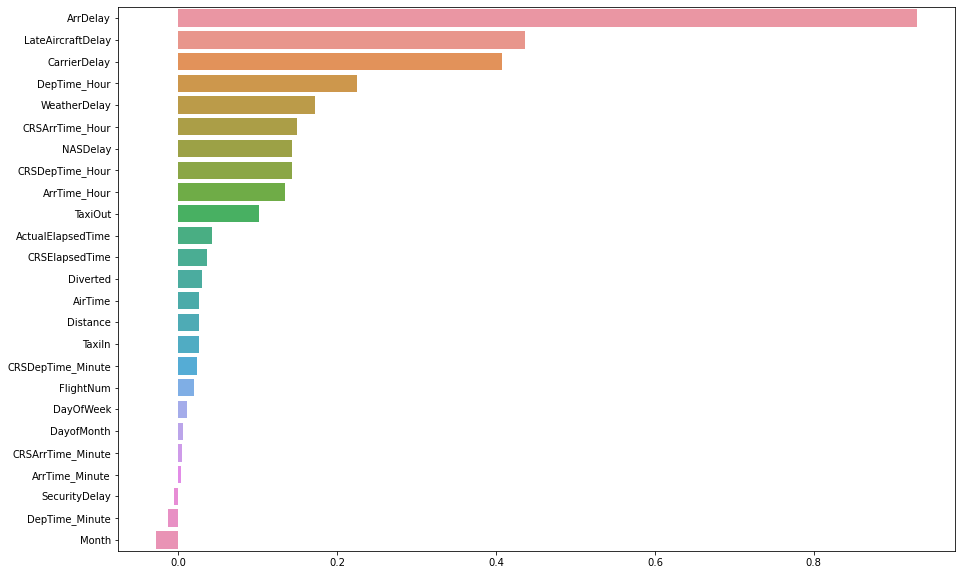

In [258]:
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

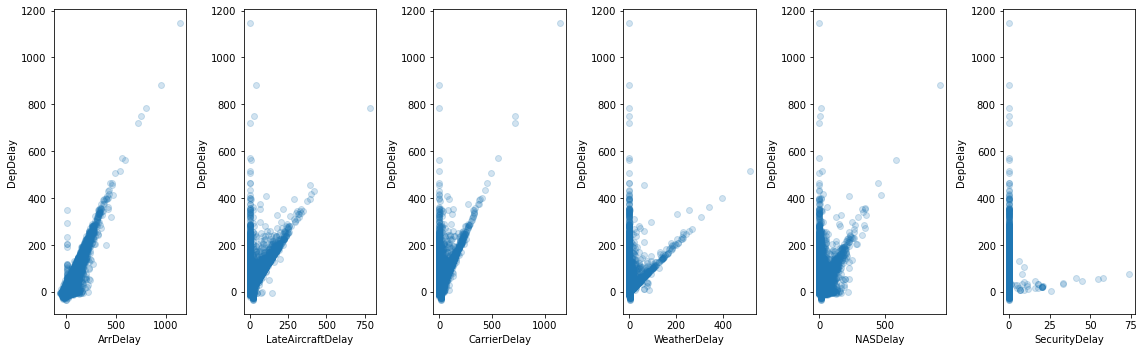

In [259]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=6)
for i, feature in enumerate(["ArrDelay", "LateAircraftDelay", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("DepDelay")
plt.tight_layout()

Признак "ArrDelay" сильно коррелирующий. Также видно, что между признаками на графиках и целевой переменной наблюдается линейная зависимость, поэтому их можно исключить из рассмотрения.

In [260]:
X = X.drop(['ArrDelay', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'], axis=1)

## **15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

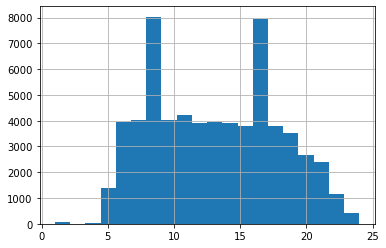

In [261]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

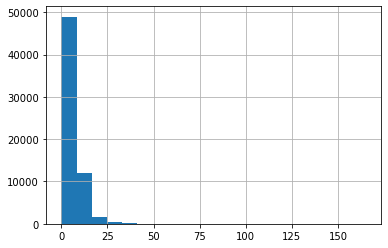

In [262]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

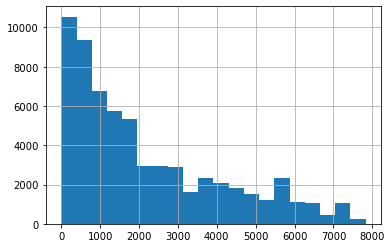

In [263]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Признаки имеют разный диапазон значений, отличающийся друг от друга в несколько раз. После масштабирования все признаки будут регуляризоваться в равной степени.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [264]:
X[['Distance', 'DepTime_Minute', 'CRSDepTime_Minute', 'CRSArrTime_Minute']] = X[['Distance', 'DepTime_Minute', 'CRSDepTime_Minute', 'CRSArrTime_Minute']].astype(float)
X[['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Diverted']] = X[['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Diverted']].astype(object)

In [265]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63404 entries, 0 to 63403
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              63404 non-null  object 
 1   DayofMonth         63404 non-null  object 
 2   DayOfWeek          63404 non-null  object 
 3   UniqueCarrier      63404 non-null  object 
 4   FlightNum          63404 non-null  object 
 5   ActualElapsedTime  63240 non-null  float64
 6   CRSElapsedTime     63399 non-null  float64
 7   AirTime            63240 non-null  float64
 8   Origin             63404 non-null  object 
 9   Dest               63404 non-null  object 
 10  Distance           63404 non-null  float64
 11  TaxiIn             63264 non-null  float64
 12  TaxiOut            63397 non-null  float64
 13  Diverted           63404 non-null  object 
 14  DepTime_Hour       63186 non-null  float64
 15  DepTime_Minute     63404 non-null  float64
 16  CRSDepTime_Hour    633

In [266]:
def transform_data(data):
    # для категориальных признаков - замена на 'nan' и one-hot-кодирование
    object_features = data.select_dtypes(['object']).columns
    data[object_features] = data[object_features].fillna('nan')
    data_object = pd.get_dummies(data[object_features])
    
    # удаление исходных категориальных признаков
    data_new = data.drop(object_features, axis = 1)
    
    # для вещественных признаков - замена на 0 и масштабирование
    numeric_features = data_new.select_dtypes(['float64']).columns
    data_new[numeric_features] = data_new[numeric_features].fillna(0)
    data_new[numeric_features] = StandardScaler().fit_transform(data_new[numeric_features])
    
    return pd.concat([data_new, data_object], axis = 1)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [267]:
XX = transform_data(X)
XX

,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,1.656383,-1.080604,1.512432,1.586498,...,0,0,0,0,0,0,0,0,0,0
1,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,0.195583,-0.232910,0.214011,-0.936014,...,0,0,0,0,0,0,0,0,0,0
2,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,-0.430474,0.727811,-0.435199,1.025940,...,0,0,0,0,0,0,0,0,0,0
3,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,-0.430474,0.614785,-0.435199,0.969884,...,0,0,0,0,0,0,0,0,0,0
4,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,-1.056531,-0.854552,-1.084410,-0.375456,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,-0.847846,-0.571987,-0.868006,-0.095177,...,0,0,0,0,0,0,0,0,0,0
63400,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,1.030326,-0.063371,1.079625,0.745661,...,0,0,0,0,0,0,0,0,0,0
63401,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,-0.430474,1.066889,-0.435199,-0.095177,...,0,0,0,0,0,0,0,0,0,0
63402,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,1.239011,-1.363169,1.296028,-1.496572,...,0,0,0,0,0,0,0,0,0,0


In [268]:
print('Количество признаков после преобразования:', XX.columns.size)

Количество признаков после преобразования: 633


## **16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [269]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y, test_size=0.3, random_state=10)

# Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

## **17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [270]:
model = LinearRegression().fit(XX_train[0:1000], yy_train[0:1000])

In [271]:
yy_train_pred = model.predict(XX_train[0:1000])
print('MSE для подвыборки:', mean_squared_error(yy_train[0:1000], yy_train_pred))
print('R2 для подвыборки:', r2_score(yy_train[0:1000], yy_train_pred))

yy_test_pred = model.predict(XX_test)
print('MSE для контрольной выборки:', mean_squared_error(yy_test, yy_test_pred))
print('R2 для контрольной выборки:', r2_score(yy_test, yy_test_pred))

MSE для подвыборки: 453.59527393991556
R2 для подвыборки: 0.5785707325357011
MSE для контрольной выборки: 1.893693938187809e+20
R2 для контрольной выборки: -1.448282221578289e+17


In [272]:
model.coef_

array([-3.77988899e+11, -1.76970801e+01,  3.63111635e+11,  2.72929382e+00,
        2.61619352e+10,  6.09008349e+10,  1.20899208e+02,  7.13769531e+00,
       -1.13222321e+02, -7.72452545e+00, -7.57977295e+00, -1.02239609e+00,
        5.80174255e+00,  4.71740723e-01,  5.70434570e-01, -5.99670410e-03,
        1.54685974e-01, -6.10351562e-04, -3.05175781e-05, -1.81484318e+00,
        9.12157059e-01,  1.79214358e-01,  1.85891247e+00,  2.27806454e+01,
        1.35013771e+00, -4.65382195e+00, -7.71758080e-01,  3.48701811e+00,
       -5.80884552e+00,  3.89774990e+00,  3.72043562e+00, -9.58983374e+00,
       -4.64487834e+01,  3.18060875e-01,  3.16960144e+00,  5.88006973e-01,
        5.01245880e+00,  1.30912333e+01,  8.72222114e+00, -9.37458515e+00,
        1.90734863e-06, -3.12996888e+00, -1.19209290e-06,  9.53674316e-07,
       -1.19209290e-06, -1.43051147e-06,  9.53674316e-07,  1.78813934e-06,
        1.19209290e-07,  3.09944153e-06, -2.38418579e-07, -3.57627869e-07,
       -1.17095592e+01,  

__MSE__ в основном измеряет среднеквадратичную ошибку прогнозов. Для каждой точки вычисляется квадратная разница между прогнозами и целью, а затем усредняются эти значения. Чем выше это значение, тем хуже модель. 

__Коэффициент детерминации, или R2__, является еще одним показателем, который тесно связан с MSE, но имеет преимущество в том, что является безмасштабным - не имеет значения, являются ли выходные значения очень большими или очень маленькими, R2 всегда будет между -∞ и 1. Когда R2 отрицательно, это означает, что модель хуже, чем предсказание среднего значения.

В нашем случае видно, что прогнозы для подвыборки существенно точнее (но тоже не являются до конца точными), чем прогнозы для контрольной выборки. Это может быть связано с тем, что большинство коэффициентов w близки к 0, а также присутствуют значения, которые, наоборот, очень велики по модулю.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

## 18. (1 балл) Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [273]:
model_L = Lasso().fit(XX_train[0:1000], yy_train[0:1000])
model_R = Ridge().fit(XX_train[0:1000], yy_train[0:1000])

In [274]:
model_L.coef_

array([ 4.52580580e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.02543433e+00,  1.51901257e+01, -0.00000000e+00,
       -6.91535982e+00, -0.00000000e+00, -3.67956851e+00, -0.00000000e+00,
        0.00000000e+00, -7.90742696e-02,  2.04234444e-01,  0.00000000e+00,
       -0.00000000e+00,  6.17065839e-04,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.47568654e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [275]:
np.sum(model_L.coef_ == 0)

624

In [276]:
model_R.coef_

array([ 4.59710402e+00, -9.59465879e+00,  4.54505567e+00,  6.49681773e-01,
        6.45099698e-01,  1.15621785e+00,  9.16886453e+01,  4.93793908e+00,
       -8.43171587e+01, -5.39156420e+00, -7.76713800e+00, -8.53974980e-01,
        5.95896166e+00,  1.82075034e-01,  4.48204181e-01, -1.97416579e-02,
        7.42940204e-02, -2.82769248e-04,  0.00000000e+00, -2.89006294e-01,
       -5.90383304e-01, -2.76359495e+00, -1.00617877e+00,  1.68788768e+01,
       -2.09144589e+00, -4.25527240e+00, -1.22222343e+00,  2.29175946e+00,
       -5.94163861e+00,  2.69890222e-01,  2.94865484e+00, -7.23560139e+00,
       -2.17659467e+01, -1.17347199e+00,  2.04178426e+00, -6.40092654e-01,
        5.32157587e+00,  1.41170887e+01,  5.10522625e+00, -8.01766652e+00,
        0.00000000e+00, -3.86402020e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.24114840e+00,  

In [277]:
np.sum(model_R.coef_ == 0)

297

C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1458.4637006876874, tolerance: 107.63259910000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69773.23350930071, tolerance: 107.63259910000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7705.989782125922, tolerance: 107.63259910000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective

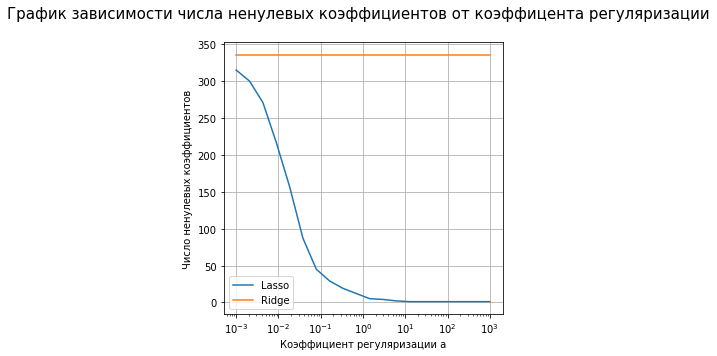

In [278]:
a = np.logspace(-3, 3, 20)
l_a = list()
r_a = list()
for i in range(len(a)):
    model_L_a = Lasso(a[i]).fit(XX_train[0:1000], yy_train[0:1000])
    l_a.append(np.sum(model_L_a.coef_ != 0))
    model_R_a = Ridge(a[i]).fit(XX_train[0:1000], yy_train[0:1000])
    r_a.append(np.sum(model_R_a.coef_ != 0))

fig = plt.figure(figsize=(5, 5))
plt.plot(a, l_a, label='Lasso')
plt.plot(a, r_a, label='Ridge')
fig.suptitle("График зависимости числа ненулевых коэффициентов от коэффицента регуляризации", fontsize=15)
plt.xscale("log")
plt.xlabel("Коэффициент регуляризации a")
plt.ylabel("Число ненулевых коэффициентов")
plt.grid()
plt.legend()
plt.show()

Из графика видно, что коэффициент регуляризации a никак не влияет на количество ненулевых коэффициентов для регуляризации Ridge, а для Lasso - чем больше коэффициент регуляризации a, тем меньше количество ненулевых коэффициентов.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [279]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [280]:
yy_pred = model_R.predict(XX_test)
print("RMSE =", rmse(yy_test, yy_pred))
print("MAE =", mean_absolute_error(yy_test, yy_pred))
print("R2 =", r2_score(yy_test, yy_pred))

RMSE = 39.434254260567144
MAE = 16.58819255701262
R2 = -0.1892979633848777


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Best alpha rmse = 26.3665
Best alpha mae = 0.0010
Best alpha r2 = 26.3665


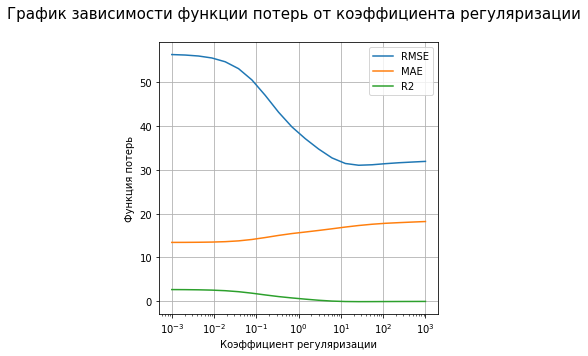

In [281]:
searcher_for_rmse = GridSearchCV(Ridge(), [{"alpha": a}], scoring=rmse_scorer, cv=5).fit(XX_train[0:1000], yy_train[0:1000])
searcher_for_mae = GridSearchCV(Ridge(), [{"alpha": a}], scoring='neg_mean_absolute_error', cv=5).fit(XX_train[0:1000], yy_train[0:1000])
searcher_for_r2 = GridSearchCV(Ridge(), [{"alpha": a}], scoring='r2', cv=5).fit(XX_train[0:1000], yy_train[0:1000])

best_alpha_rmse = searcher_for_rmse.best_params_["alpha"]
best_alpha_mae = searcher_for_mae.best_params_["alpha"]
best_alpha_r2 = searcher_for_r2.best_params_["alpha"]

print("Best alpha rmse = %.4f" % best_alpha_rmse)
print("Best alpha mae = %.4f" % best_alpha_mae)
print("Best alpha r2 = %.4f" % best_alpha_r2)

fig = plt.figure(figsize=(5, 5))
plt.plot(a, -searcher_for_rmse.cv_results_["mean_test_score"], label='RMSE')
plt.plot(a, -searcher_for_mae.cv_results_["mean_test_score"], label='MAE')
plt.plot(a, -searcher_for_r2.cv_results_["mean_test_score"],label='R2')
fig.suptitle("График зависимости функции потерь от коэффициента регуляризации", fontsize=15)
plt.xscale("log")
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Функция потерь")
plt.grid()
plt.legend()
plt.show()

In [282]:
model_R_rmse = Ridge(best_alpha_rmse).fit(XX_train[0:1000], yy_train[0:1000])
model_R_mae = Ridge(best_alpha_mae).fit(XX_train[0:1000], yy_train[0:1000])
model_R_r2 = Ridge(best_alpha_r2).fit(XX_train[0:1000], yy_train[0:1000])

yy_pred_rmse = model_R_rmse.predict(XX_test)
yy_pred_mae = model_R_mae.predict(XX_test)
yy_pred_r2 = model_R_r2.predict(XX_test)

print("RMSE =", rmse(yy_test, yy_pred_rmse))
print("MAE =", mean_absolute_error(yy_test, yy_pred_mae))
print("R2 =", r2_score(yy_test, yy_pred_r2))

RMSE = 34.55072791027018
MAE = 16.73061841052805
R2 = 0.08702725341504514


Видим, что значение RMSE немного уменьшилось, значение MAE осталось почти таким же, а вот значение R2 стало положительным, что хорошо, т.к. при отрицательном R2 модель считается плохой.

## __19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

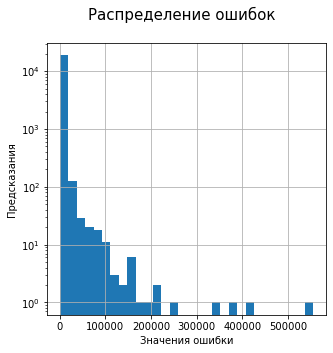

In [283]:
yy_predd = cross_val_predict(Ridge(), XX_test, yy_test)
errors = (yy_predd - yy_test)**2

fig = plt.figure(figsize=(5, 5))
plt.hist(errors, bins=30)
plt.yscale('log')
fig.suptitle("Распределение ошибок", fontsize=15)
plt.xlabel("Значения ошибки")
plt.ylabel("Предсказания")
plt.grid()
plt.show()

Из распределения видно, что основная часть предсказаний имеет ошибку с наименьшим значением.